# Project Details
This project is about predicting whether a customer will leave or left, something known as "CHURNING".

Customers who left within the last month – the column is called Exited

The dataset contains 10000 samples. Each sample contains 13 features and 1 boolean variable "Exited" which indicates the class of the sample. The 13 input features and 1 target variable.


In the Project I've used 6   CLASSIFICATION TECHNICS  which are ::
<b>
> 1 Decision Tree,
>> 2 Logistic Regression,
>>> 3 ANN,
>>>> 4 SVM,
>>>>> 5 Random Forest,
>>>>>> 6 CAT Boost <b>  

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
DF1 = pd.read_csv('Churn_Modelling.csv')
DF1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Indipendent variable

+ CustomerId : Unique ID
+ Surname : Names of the person
+ CreditScore : credit score of the coustomers Low or high
+ Geography : country of customers
+ Gender : M or F
+ Age : 18years to 92years
+ Tenure : Period from the date of disbursement of loan to the date of closure of loan.
+ Balance : Bank Balance
+ Num Of Products :
+ HasCrCard : has credit card(1) or not(0)	
+ IsActiveMember : active(1) or not(0)
+ EstimatedSalary : salary of the customers

### Dependent variable
+ Exited : Coustmer stayed(0) or left(1) the bank within 6 months

In [3]:
DF1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
DF1.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
DF1['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
DF2 = DF1.drop(columns=['CustomerId', 'Surname', 'RowNumber'])

In [7]:
DF2.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

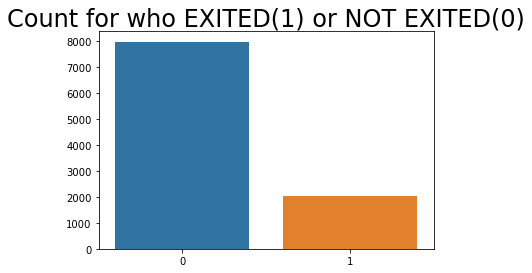

In [8]:
y = DF2["Exited"].value_counts()
#print (y)
sns.barplot(y.index, y.values)
plt.title('Count for who EXITED(1) or NOT EXITED(0)', size = 24)
plt.show()

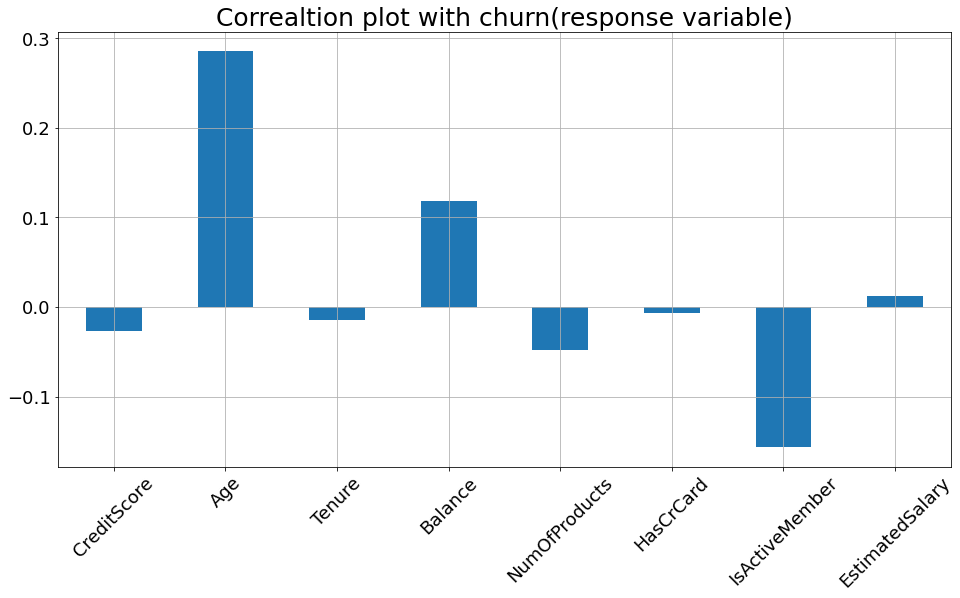

In [9]:
# Correlation plot

DF3 = DF2.drop(columns = ['Exited'])

DF3.corrwith(DF2['Exited']).plot.bar(figsize = (16,8), fontsize = 18, rot = 45, grid = True)
plt.title('Correaltion plot with churn(response variable)' ,size = 25);
plt.show()

#### Correlation status
+ CreditScore     = Negative,
+ Age             = Extremly Positive(older are most likely to leave),
+ Tenure          = Neutral,
+ Balance         = Positive,
+ NumOfProducts   = Negative,
+ HasCrCard       = Neutral,
+ IsActiveMember  = Higly Negative,
+ EstimatedSalary = Neutral

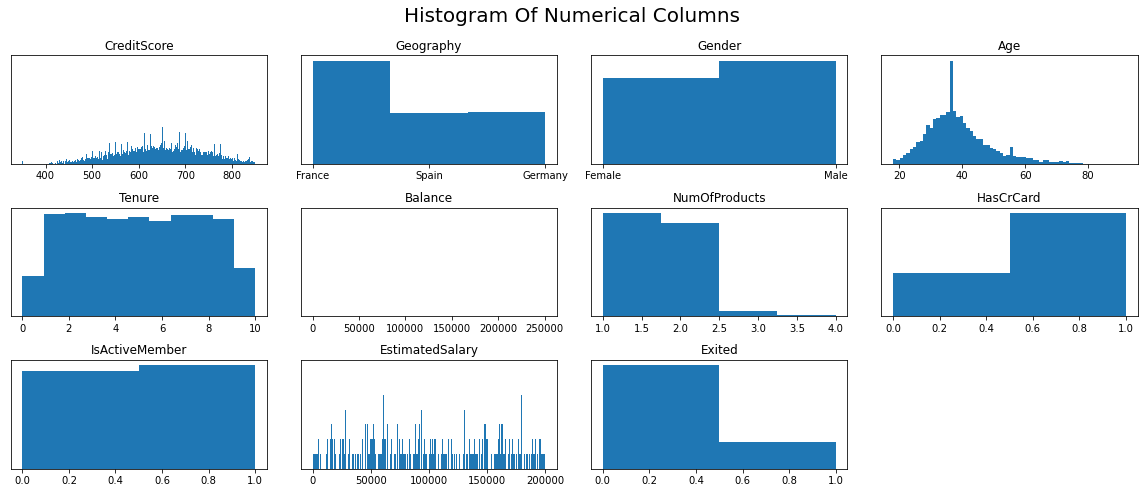

In [10]:
# DISTRIBUTION
fig = plt.figure(figsize= (16,10))
plt.suptitle('Histogram Of Numerical Columns', fontsize = 20)
for i in range(1, DF2.shape[1] + 1):
    plt.subplot(3,4,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(DF2.columns.values[i-1])
    
    vals = np.size(DF2.iloc[:, i - 1].unique())
    
    plt.hist(DF2.iloc[:,i-1], bins = vals)
plt.tight_layout(rect= [0, 0.3, 1, 0.95])

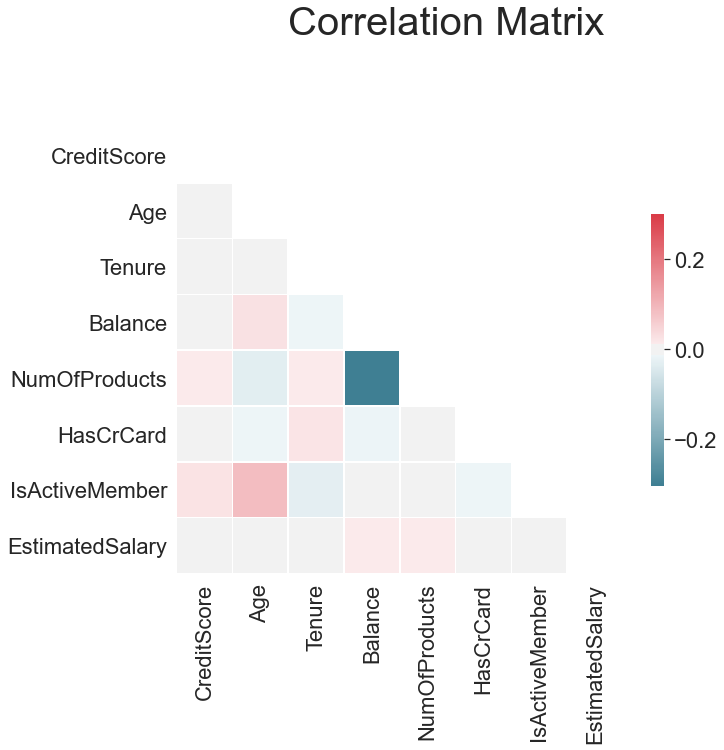

In [11]:
#Correlation Matrix
sns.set(style='white', font_scale=2)

#compute the correlation matrix
corr = DF3.corr()

#Genrate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#setup the matplotlib figure
f, ax = plt.subplots(figsize = (10,10))
f.suptitle('Correlation Matrix', fontsize = 40)

#Genrate  custom diverging coolmap
cmap = sns.diverging_palette(220,10,as_cmap=True)

#yDraw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap= cmap, vmax = 0.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5});

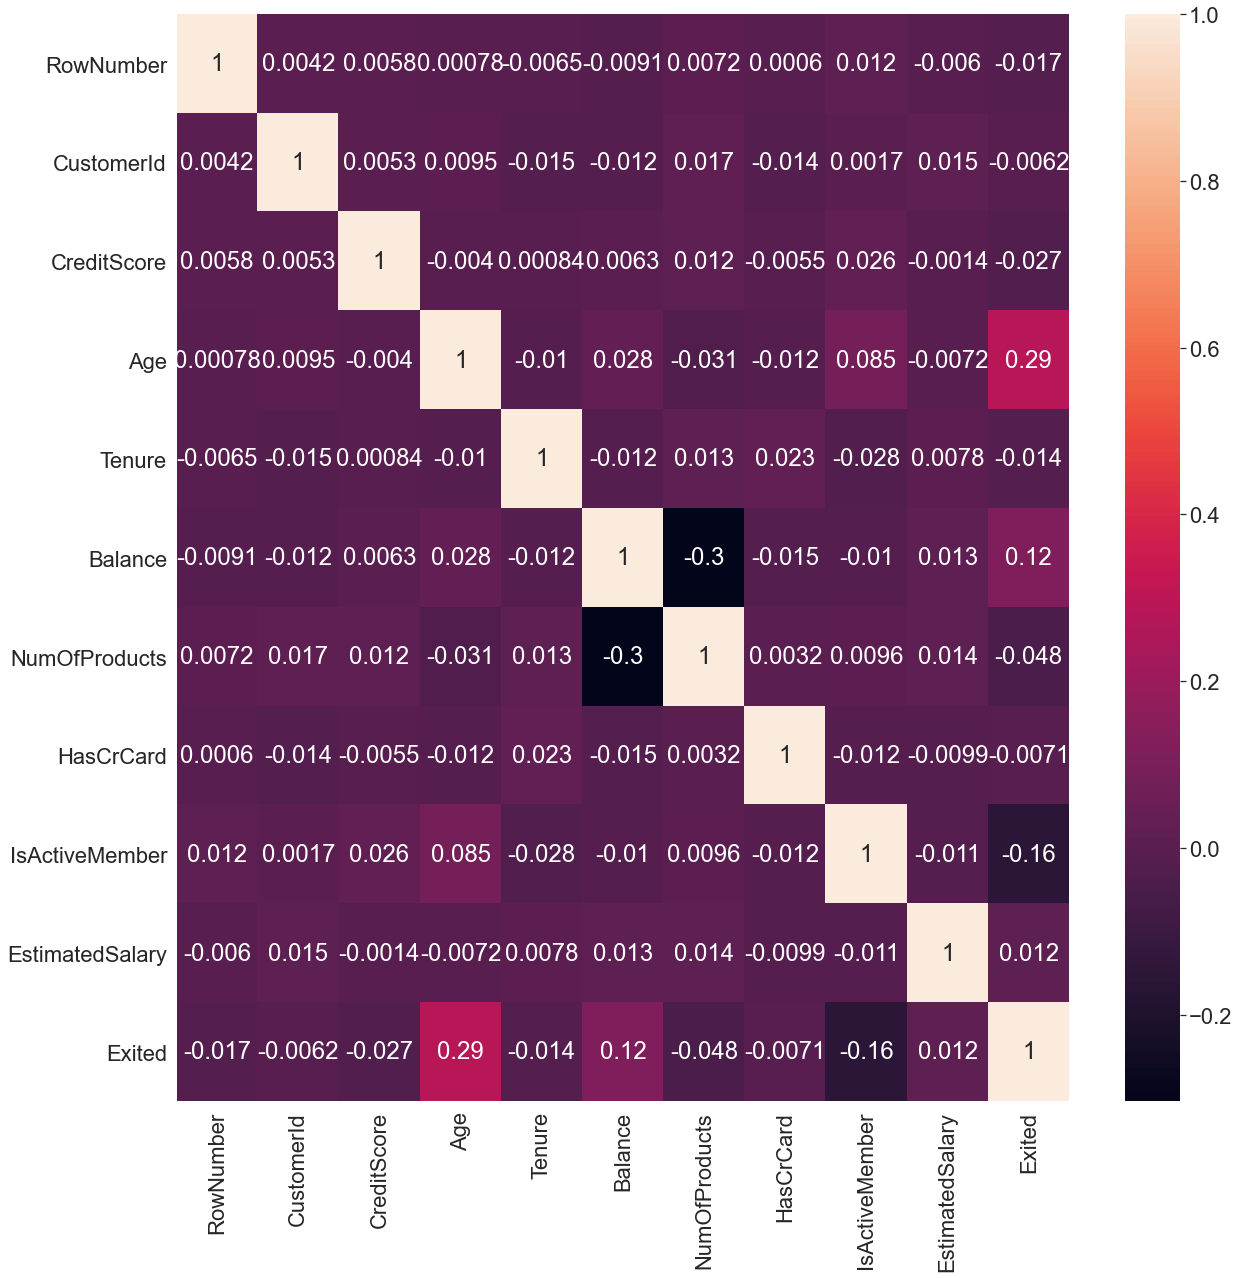

In [12]:
#Correlation Matrix
plt.figure(figsize = (20,20))
sns.heatmap(DF1.corr(),annot=True);

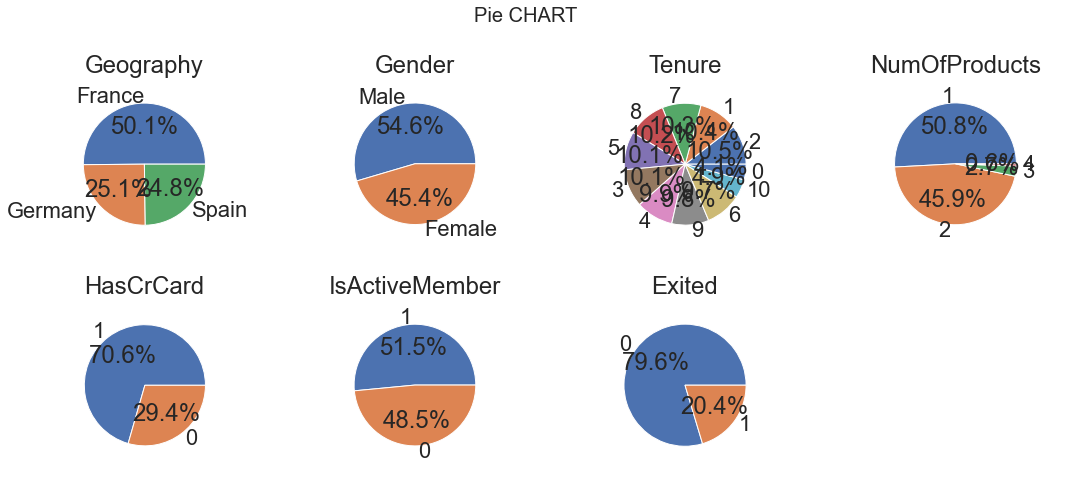

In [13]:
# DISTRIBUTION
DF4 = DF2[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

fig = plt.figure(figsize= (16,10))
plt.suptitle('Pie CHART', fontsize = 20)
for i in range(1, DF4.shape[1] + 1):
    plt.subplot(2,4,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(DF4.columns.values[i-1])
    
    values = DF4.iloc[:, i - 1].value_counts(normalize = True).values
    index  = DF4.iloc[:, i - 1].value_counts(normalize = True).index
    
    plt.pie(values, labels = index, autopct ='%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect= [0, 0.3, 1, 0.95])

                                                                           20.4% users has been left yet

In [14]:
DF1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
DF5 = pd.get_dummies(DF2)
DF5.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [16]:
user_ID = DF1['CustomerId']
user_name = DF1['Surname']

In [17]:
X = DF5.drop(columns= ['Exited'])
y = DF5.iloc[:,8]    # or DF5['Exited']

          # OR

# X = DF5.iloc[:, DF2.columns != 'Exited']
# y = DF5.iloc[:, DF2.columns == 'Exited']

In [18]:
# Data splitting
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test))

X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns  = X_test.columns.values

X_train_scaled.index   = X_train.index
X_test_scaled.index    = X_test.index


X_train = X_train_scaled
X_test = X_test_scaled

# Models

## 1. Decisoin Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state= 42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred_DT = classifier.predict(X_test)

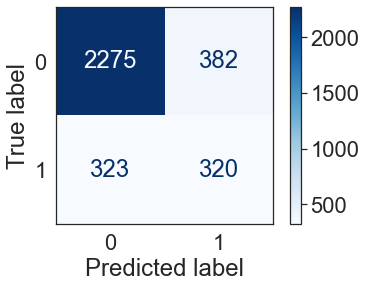

In [22]:
# RESULTS
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred_DT))

accuracy        = accuracy_score(y_test,y_pred_DT)
precision_score =  precision_score(y_test,y_pred_DT)
f1_score        =  f1_score(y_test,y_pred_DT)
recall_score    =  recall_score(y_test,y_pred_DT)



results = pd.DataFrame([['Decision_Tree', round(accuracy*100,2), precision_score, f1_score, recall_score, rmse]],
                      columns= ['Model Name', 'Accuracy', 'precision_score', 'F1-score', 'Recall', 'RMSE'])
results

,Model Name,Accuracy,precision_score,F1-score,Recall,RMSE
0,Decision_Tree,78.64,0.45584,0.475836,0.497667,0.462208


## 2. LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 42)

classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [25]:
y_pred_LR = classifier.predict(X_test)

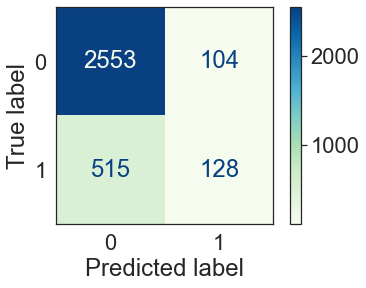

In [26]:
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'GnBu')  # doctest: +SKIP
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
rmse = sqrt(mean_squared_error(y_test, y_pred_LR))

accuracy        = accuracy_score(y_test,y_pred_LR)
precision_score =  precision_score(y_test,y_pred_LR)
f1_score        =  f1_score(y_test,y_pred_LR)
recall_score    =  recall_score(y_test,y_pred_LR)



model_results = pd.DataFrame([['Logistic Regression', round(accuracy*100,2), precision_score, f1_score, recall_score, rmse]],
                      columns= ['Model Name', 'Accuracy', 'precision_score', 'F1-score', 'Recall', 'RMSE'])
results = results.append(model_results, ignore_index= True)
results

,Model Name,Accuracy,precision_score,F1-score,Recall,RMSE
0,Decision_Tree,78.64,0.455840,0.475836,0.497667,0.462208
1,Logistic Regression,81.24,0.551724,0.292571,0.199067,0.433100


## 3. ANN

In [28]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [29]:
X_train.shape

(6700, 13)

In [30]:
model = Sequential()
model.add(Dense(units = 5, input_dim = 13, activation = 'relu')) # Input Layer
model.add(Dense(units = 10, activation = 'relu')) #        \
model.add(Dense(units = 20, activation = 'relu')) #         \
model.add(Dropout(0.5)) #                                    > Hidden Layers
model.add(Dense(20, activation = 'relu')) #                 /
model.add(Dense(10, activation = 'relu')) #                /
model.add(Dense(1, activation = 'sigmoid')) # Binary output Layer

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 70        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

In [32]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics='accuracy')

In [33]:
epochs_hist = model.fit(x = X_train, y = y_train, epochs = 50, batch_size = 10, verbose = 1, validation_split = 0.33)

Epoch 1/50
449/449 [==============================] - 3s 6ms/step - loss: 0.5299 - accuracy: 0.7910 - val_loss: 0.4914 - val_accuracy: 0.7907
Epoch 2/50
449/449 [==============================] - 2s 4ms/step - loss: 0.4881 - accuracy: 0.7926 - val_loss: 0.4676 - val_accuracy: 0.7907
Epoch 3/50
449/449 [==============================] - 2s 3ms/step - loss: 0.4657 - accuracy: 0.7910 - val_loss: 0.4553 - val_accuracy: 0.7925
Epoch 4/50
449/449 [==============================] - 2s 4ms/step - loss: 0.4546 - accuracy: 0.7941 - val_loss: 0.4498 - val_accuracy: 0.7929
Epoch 5/50
449/449 [==============================] - 2s 4ms/step - loss: 0.4499 - accuracy: 0.8012 - val_loss: 0.4442 - val_accuracy: 0.8065
Epoch 6/50
449/449 [==============================] - 2s 4ms/step - loss: 0.4394 - accuracy: 0.8024 - val_loss: 0.4396 - val_accuracy: 0.8165
Epoch 7/50
449/449 [==============================] - 1s 3ms/step - loss: 0.4373 - accuracy: 0.8030 - val_loss: 0.4328 - val_accuracy: 0.8178
Epoch 

In [34]:
score = model.evaluate(X_test, y_test)

104/104 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8630


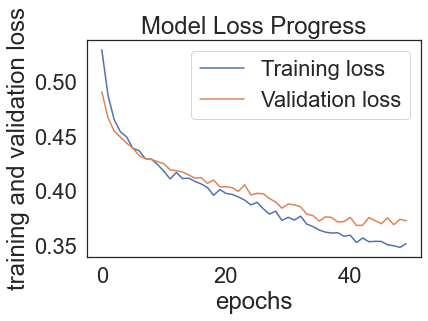

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress')
plt.ylabel('training and validation loss')
plt.xlabel('epochs')
plt.legend(['Training loss', 'Validation loss']);

In [36]:
y_pred_ANN = (model.predict(X_test)).round()

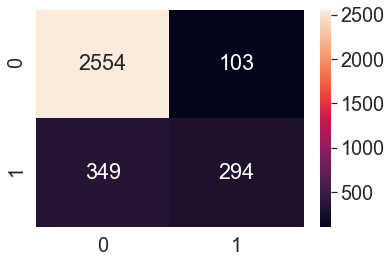

In [37]:
# RESULTS
CM = confusion_matrix(y_test, y_pred_ANN)
sns.set(font_scale=1.8)
sns.heatmap(CM, annot = True, fmt='d');  

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

rmse = sqrt(mean_squared_error(y_test, y_pred_ANN))

accuracy        = accuracy_score(y_test,y_pred_ANN)
precision_score =  precision_score(y_test,y_pred_ANN)
f1_score        =  f1_score(y_test,y_pred_ANN)
recall_score    =  recall_score(y_test,y_pred_ANN)



model_results = pd.DataFrame([['ANN', round(accuracy*100,2), precision_score, f1_score, recall_score, rmse]],
                      columns= ['Model Name', 'Accuracy', 'precision_score', 'F1-score', 'Recall', 'RMSE'])
results = results.append(model_results, ignore_index= True)
results

,Model Name,Accuracy,precision_score,F1-score,Recall,RMSE
0,Decision_Tree,78.64,0.455840,0.475836,0.497667,0.462208
1,Logistic Regression,81.24,0.551724,0.292571,0.199067,0.433100
2,ANN,86.30,0.740554,0.565385,0.457232,0.370094


## 4. SVM 

In [39]:
from sklearn.svm import SVC # SUPPORT VECTOR CLASSIFIER

classifier = SVC(random_state= 42)   
classifier.fit(X_train,y_train)

SVC(random_state=42)

In [40]:
y_pred_svc = classifier.predict(X_test)

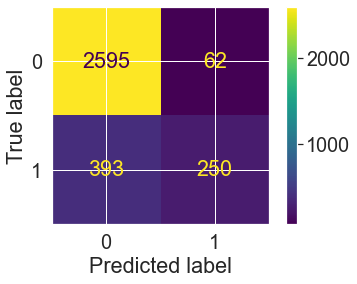

In [41]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

rmse = sqrt(mean_squared_error(y_test, y_pred_svc))

accuracy = accuracy_score(y_test, y_pred_svc)
f1_score        =  f1_score(y_test, y_pred_svc)
recall_score    =  recall_score(y_test, y_pred_svc)
precision_score =  precision_score(y_test,y_pred_svc)



model_results = pd.DataFrame([['SVM', round(accuracy*100,2), precision_score, f1_score, recall_score, rmse]],
                      columns= ['Model Name', 'Accuracy', 'precision_score', 'F1-score', 'Recall', 'RMSE'])
results = results.append(model_results, ignore_index= True)
results

,Model Name,Accuracy,precision_score,F1-score,Recall,RMSE
0,Decision_Tree,78.64,0.455840,0.475836,0.497667,0.462208
1,Logistic Regression,81.24,0.551724,0.292571,0.199067,0.433100
2,ANN,86.30,0.740554,0.565385,0.457232,0.370094
3,SVM,86.21,0.801282,0.523560,0.388802,0.371320


## 5. Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier(n_estimators = 1000, random_state= 42)
Classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=1000, random_state=42)

In [44]:
y_pred_RF = Classifier.predict(X_test)

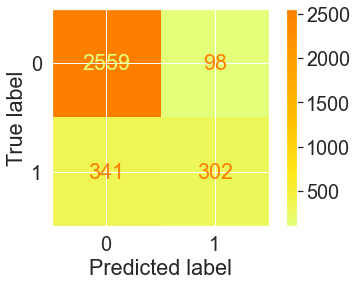

In [45]:
# RESULTS

plot_confusion_matrix(Classifier, X_test, y_test, cmap = 'Wistia')
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

rmse = sqrt(mean_squared_error(y_test, y_pred_RF))


accuracy        = accuracy_score(y_test,y_pred_RF)
precision_score =  precision_score(y_test,y_pred_RF)
f1_score        =  f1_score(y_test,y_pred_RF)
recall_score    =  recall_score(y_test,y_pred_RF)



model_results = pd.DataFrame([['Random Forest(n=1000)', round(accuracy*100,2), precision_score, f1_score, recall_score, rmse]],
                      columns= ['Model Name', 'Accuracy', 'precision_score', 'F1-score', 'Recall', 'RMSE'])
results = results.append(model_results, ignore_index= True)
results

,Model Name,Accuracy,precision_score,F1-score,Recall,RMSE
0,Decision_Tree,78.64,0.455840,0.475836,0.497667,0.462208
1,Logistic Regression,81.24,0.551724,0.292571,0.199067,0.433100
2,ANN,86.30,0.740554,0.565385,0.457232,0.370094
3,SVM,86.21,0.801282,0.523560,0.388802,0.371320
4,Random Forest(n=1000),86.70,0.755000,0.579099,0.469673,0.364733


# 6. CatBoost

Catboost = can handles catagory itself wheather they are number or text.
           can't handel NaN

Xgboost =  can handles NaN.

seed = seed play around with this variable as it will change winners, SEED force to come up with the same random number. \
use SEED = 1234 or random_state = 42


In [47]:
DF2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
DF2.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [49]:
#map catagorical features

feature = [feat for feat in list(DF2) if feat != 'Exited' ]
print(feature)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [50]:
# which 1 is catagorical
DF2_catagories = np.where(DF2[feature].dtypes != np.float)[0]
DF2_catagories

array([0, 1, 2, 3, 4, 6, 7, 8], dtype=int64)

### catboost model

In [51]:
from catboost import CatBoostClassifier

X_c = DF2[feature]
y_c = DF2['Exited']
seed = 42

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size = 0.33, random_state = seed)

In [52]:
params = {'iterations': 5000,
        'learning_rate': 0.01,# converge too fast try smaller num vive verca.
        'cat_features': DF2_catagories,
        'depth': 3,
        'eval_metric':'AUC',
        'verbose': 200,
        'od_type': "Iter", # overfit detector
        'od_wait': 500, # most recent best iteration to wait before stopping
        'random_seed': seed
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7503551	best: 0.7503551 (0)	total: 169ms	remaining: 14m 5s
200:	test: 0.8503738	best: 0.8503738 (200)	total: 3.74s	remaining: 1m 29s
400:	test: 0.8601394	best: 0.8601394 (400)	total: 7.54s	remaining: 1m 26s
600:	test: 0.8636537	best: 0.8636753 (597)	total: 12s	remaining: 1m 28s
800:	test: 0.8660459	best: 0.8660541 (798)	total: 16.8s	remaining: 1m 27s
1000:	test: 0.8670931	best: 0.8670931 (1000)	total: 21.3s	remaining: 1m 25s
1200:	test: 0.8676989	best: 0.8677129 (1196)	total: 26.4s	remaining: 1m 23s
1400:	test: 0.8686430	best: 0.8686430 (1400)	total: 31.2s	remaining: 1m 20s
1600:	test: 0.8691856	best: 0.8692412 (1559)	total: 36s	remaining: 1m 16s
1800:	test: 0.8697317	best: 0.8697317 (1800)	total: 41.6s	remaining: 1m 13s
2000:	test: 0.8698956	best: 0.8699290 (1933)	total: 48s	remaining: 1m 11s
2200:	test: 0.8699465	best: 0.8700308 (2074)	total: 53.4s	remaining: 1m 7s
2400:	test: 0.8700882	best: 0.8700882 (2400)	total: 59.5s	remaining: 1m 4s
2600:	test: 0.8705535	best: 0.8705

In [53]:
# IF green line goes down it means its not learning

In [54]:
pred_cat = cat_model.predict(X_test)

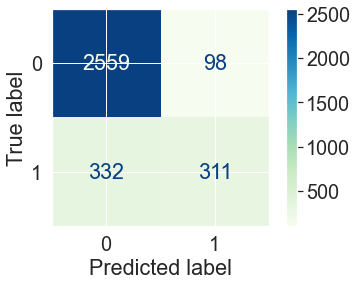

In [55]:
# RESULTS
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(cat_model, X_test, y_test, cmap = 'GnBu')
plt.show()

In [56]:
# Features importance
feat_imp = [t for t in zip(feature, cat_model.feature_importances_)]
feat_imp_df = pd.DataFrame(feat_imp, columns= ['Feature', 'VarImportance'])
feat_imp_df = feat_imp_df.sort_values('VarImportance', ascending = False)
feat_imp_df[feat_imp_df['VarImportance'] > 0]

,Feature,VarImportance
6,NumOfProducts,28.219136
3,Age,23.280157
5,Balance,15.598277
1,Geography,9.878734
8,IsActiveMember,8.702833
9,EstimatedSalary,4.495647
4,Tenure,3.966208
0,CreditScore,2.994345
2,Gender,2.659880
7,HasCrCard,0.204781


### Formatting final results

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

rmse = sqrt(mean_squared_error(y_test, pred_cat))

accuracy        = accuracy_score(y_test, pred_cat)
f1_score        =  f1_score(y_test, pred_cat)
recall_score    =  recall_score(y_test, pred_cat)
precision_score =  precision_score(y_test, pred_cat)



model_results = pd.DataFrame([['CATBoost', round(accuracy*100,2), precision_score, f1_score, recall_score, rmse]],
                      columns= ['Model Name', 'Accuracy', 'precision_score', 'F1-score', 'Recall', 'RMSE'])
results = results.append(model_results, ignore_index= True)
results

,Model Name,Accuracy,precision_score,F1-score,Recall,RMSE
0,Decision_Tree,78.64,0.455840,0.475836,0.497667,0.462208
1,Logistic Regression,81.24,0.551724,0.292571,0.199067,0.433100
2,ANN,86.30,0.740554,0.565385,0.457232,0.370094
3,SVM,86.21,0.801282,0.523560,0.388802,0.371320
4,Random Forest(n=1000),86.70,0.755000,0.579099,0.469673,0.364733
5,CATBoost,86.97,0.760391,0.591255,0.483670,0.360975
